In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isna().sum().sum()


0

In [6]:
# Check for empty strings that might become NaN during conversion
(df == "").sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
for col in df.columns:
    if len(df[col].unique()) <= 5:
        print(col, df[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

In [14]:
class BinaryClassEncoder(BaseEstimator, TransformerMixin):


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        columns = X.columns
        for col in columns:
            if set(X[col].unique()) == {"Yes", "No"}:
                X[col] = X[col].map({"Yes": 1, "No": 0})

        return X
        
        

    

In [15]:
class YesNoNoService(BaseEstimator, TransformerMixin):


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        columns = X.columns
        for col in columns:
            for col in X.columns:
                if set(X[col].unique()) == {'No', 'Yes', 'No internet service'}:
                    X[col] = X[col].map({'Yes': 1, 'No': 0, 'No internet service': -1})
                elif set(X[col].unique()) == {'No', 'Yes', 'No phone service'}:
                    X[col] = X[col].map({'Yes': 1, 'No': 0, 'No phone service': -1})
                 
        return X
        
        


In [16]:
class Category2Number(BaseEstimator, TransformerMixin):


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        columns = X.columns
        payment_mapping = {
            'Electronic check': 0,
            'Mailed check': 1,
            'Bank transfer (automatic)': 2,
            'Credit card (automatic)': 3
        }
        gender_mapping = {
            "Male": 0,
            "Female": 1
        }
        contract_mapping = {'Month-to-month': 0.1, 'One year': 1, 'Two year': 2}
        X["PaymentMethod"] = X["PaymentMethod"].map(payment_mapping) 
        X["gender"] = X["gender"].map(gender_mapping)
        X["Contract"] = X["Contract"].map(contract_mapping)
        return X
        
        


In [17]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class CustomScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = X.copy()
    
        # Convert "TotalCharges" to float if needed
        if 'TotalCharges' in X.columns:
            X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
    
        # Automatically detect numeric columns
        self.numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
        
        # Compute mean and std
        self.means_ = X[self.numeric_cols].mean()
        self.stds_ = X[self.numeric_cols].std()
        
        return self


    def transform(self, X):
        X = X.copy()

        # Convert "TotalCharges" to float if it exists
        if 'TotalCharges' in X.columns:
            X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

        # Detect numerical columns again after conversion
        self.numeric_cols = X.select_dtypes(include=[np.number]).columns
        
        # Apply scaling
        X[self.numeric_cols] = (X[self.numeric_cols] - self.means_) / self.stds_
        return X


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np

class OneHotAndScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Define categorical and numerical columns (hardcoded)
        self.categorical_cols = ['InternetService']
        self.numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
        
        # Initialize transformers
        self.onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        X = X.copy()

        # Convert "TotalCharges" to float if needed
        if 'TotalCharges' in X.columns:
            X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce').fillna(0)

        # Fit OneHotEncoder on categorical columns
        self.onehot_encoder.fit(X[self.categorical_cols])

        # Fit StandardScaler on numerical columns
        self.scaler.fit(X[self.numeric_cols])

        return self

    def transform(self, X):
        X = X.copy()

        # Convert "TotalCharges" to float again (for consistency)
        if 'TotalCharges' in X.columns:
            X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce').fillna(0)

        # Apply OneHotEncoding
        encoded_cats = self.onehot_encoder.transform(X[self.categorical_cols])
        cat_columns = self.onehot_encoder.get_feature_names_out(self.categorical_cols)
        encoded_df = pd.DataFrame(encoded_cats, columns=cat_columns, index=X.index)

        # Apply Standard Scaling
        scaled_nums = self.scaler.transform(X[self.numeric_cols])
        scaled_df = pd.DataFrame(scaled_nums, columns=self.numeric_cols, index=X.index)

        # Drop original columns and merge encoded & scaled features
        X = X.drop(columns=self.categorical_cols + self.numeric_cols)
        X = pd.concat([X, encoded_df, scaled_df], axis=1)

        return X


In [19]:
class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
        self.encoder.fit(X[['InternetService', 'Contract', 'PaymentMethod']])
        return self

    def transform(self, X):
        X = X.copy()

        # Apply One-Hot Encoding
        encoded_cats = self.encoder.transform(X[['InternetService', 'Contract', 'PaymentMethod']])
        cat_columns = self.encoder.get_feature_names_out(['InternetService', 'Contract', 'PaymentMethod'])
        encoded_df = pd.DataFrame(encoded_cats, columns=cat_columns, index=X.index)

        # Drop original categorical columns and merge with encoded ones
        X = X.drop(columns=['InternetService', 'Contract', 'PaymentMethod'])
        X = pd.concat([X, encoded_df], axis=1)

        return X


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [21]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

full_pipeline = Pipeline([
   
    ('binaryclassencoder', BinaryClassEncoder()),  # Custom categorical mapping
    ('yesnonoservice', YesNoNoService()),  # OneHotEncoder for remaining categorical
     ("category2number", Category2Number()),
    ("onehotandscaler", OneHotAndScaler())
    
    
])

In [22]:
X = full_pipeline.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,0,1,0,0,-1,0,1,0,...,0.1,1,0,0,1.0,0.0,0.0,-1.277445,-1.160323,-0.992611
1,5575-GNVDE,0,0,0,0,1,0,1,0,1,...,1.0,0,1,0,1.0,0.0,0.0,0.066327,-0.259629,-0.172165
2,3668-QPYBK,0,0,0,0,1,0,1,1,0,...,0.1,1,1,1,1.0,0.0,0.0,-1.236724,-0.362660,-0.958066
3,7795-CFOCW,0,0,0,0,0,-1,1,0,1,...,1.0,0,2,0,1.0,0.0,0.0,0.514251,-0.746535,-0.193672
4,9237-HQITU,1,0,0,0,1,0,0,0,0,...,0.1,1,0,1,0.0,1.0,0.0,-1.236724,0.197365,-0.938874


In [24]:
print(X.isna().sum().sum())  # Should be 0


0


In [25]:
X['Contract_MonthToMonth'] = (X['Contract'] == 0.1).astype(int) * 0.1
X['Contract_OneYear'] = (X['Contract'] == 1).astype(int) * 1
X['Contract_TwoYear'] = (X['Contract'] == 2).astype(int) * 2


In [26]:
X["UniqueID"] = X.index


In [27]:
X

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure,MonthlyCharges,TotalCharges,Contract_MonthToMonth,Contract_OneYear,Contract_TwoYear,UniqueID
0,7590-VHVEG,1,0,1,0,0,-1,0,1,0,...,1.0,0.0,0.0,-1.277445,-1.160323,-0.992611,0.1,0,0,0
1,5575-GNVDE,0,0,0,0,1,0,1,0,1,...,1.0,0.0,0.0,0.066327,-0.259629,-0.172165,0.0,1,0,1
2,3668-QPYBK,0,0,0,0,1,0,1,1,0,...,1.0,0.0,0.0,-1.236724,-0.362660,-0.958066,0.1,0,0,2
3,7795-CFOCW,0,0,0,0,0,-1,1,0,1,...,1.0,0.0,0.0,0.514251,-0.746535,-0.193672,0.0,1,0,3
4,9237-HQITU,1,0,0,0,1,0,0,0,0,...,0.0,1.0,0.0,-1.236724,0.197365,-0.938874,0.1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,1,1,1,0,1,...,1.0,0.0,0.0,-0.340876,0.665992,-0.127605,0.0,1,0,7038
7039,2234-XADUH,1,0,1,1,1,1,0,1,1,...,0.0,1.0,0.0,1.613701,1.277533,2.242606,0.0,1,0,7039
7040,4801-JZAZL,1,0,1,1,0,-1,1,0,0,...,1.0,0.0,0.0,-0.870241,-1.168632,-0.852932,0.1,0,0,7040
7041,8361-LTMKD,0,1,1,0,1,1,0,0,0,...,0.0,1.0,0.0,-1.155283,0.320338,-0.870513,0.1,0,0,7041


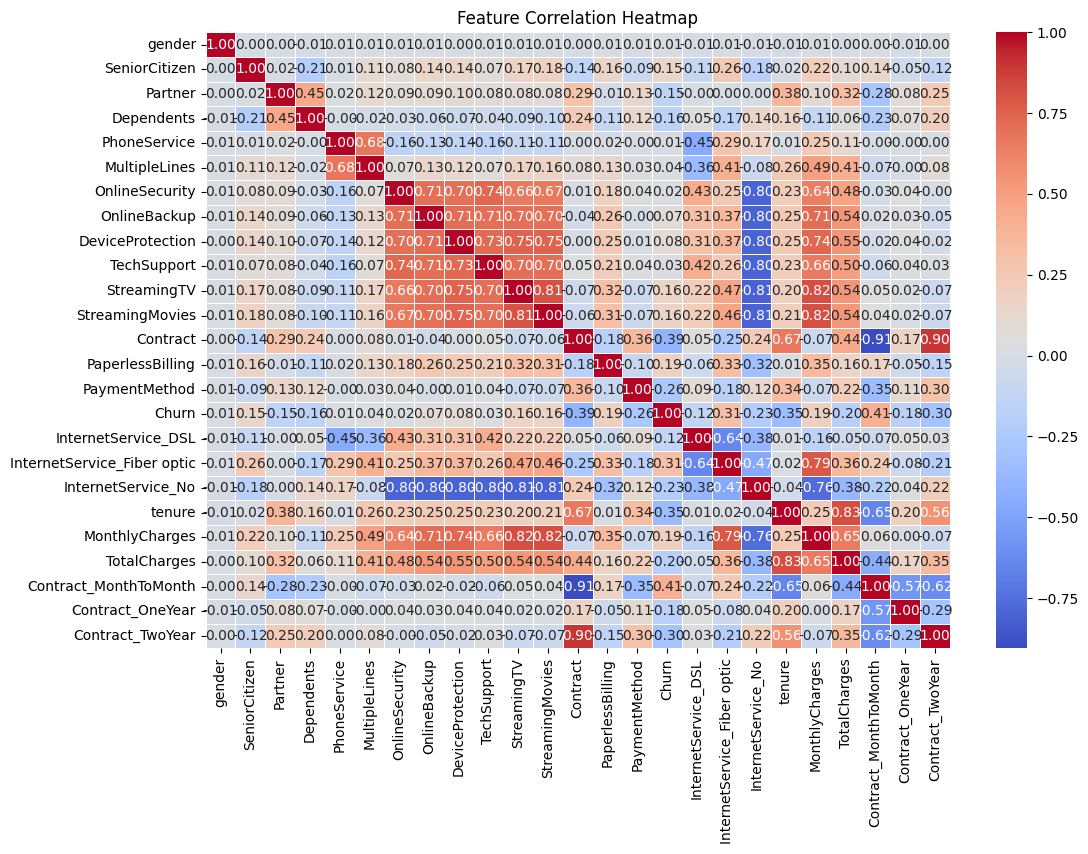

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = X.drop(columns=["customerID", "UniqueID"]).corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


In [29]:
X

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure,MonthlyCharges,TotalCharges,Contract_MonthToMonth,Contract_OneYear,Contract_TwoYear,UniqueID
0,7590-VHVEG,1,0,1,0,0,-1,0,1,0,...,1.0,0.0,0.0,-1.277445,-1.160323,-0.992611,0.1,0,0,0
1,5575-GNVDE,0,0,0,0,1,0,1,0,1,...,1.0,0.0,0.0,0.066327,-0.259629,-0.172165,0.0,1,0,1
2,3668-QPYBK,0,0,0,0,1,0,1,1,0,...,1.0,0.0,0.0,-1.236724,-0.362660,-0.958066,0.1,0,0,2
3,7795-CFOCW,0,0,0,0,0,-1,1,0,1,...,1.0,0.0,0.0,0.514251,-0.746535,-0.193672,0.0,1,0,3
4,9237-HQITU,1,0,0,0,1,0,0,0,0,...,0.0,1.0,0.0,-1.236724,0.197365,-0.938874,0.1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,1,1,1,0,1,...,1.0,0.0,0.0,-0.340876,0.665992,-0.127605,0.0,1,0,7038
7039,2234-XADUH,1,0,1,1,1,1,0,1,1,...,0.0,1.0,0.0,1.613701,1.277533,2.242606,0.0,1,0,7039
7040,4801-JZAZL,1,0,1,1,0,-1,1,0,0,...,1.0,0.0,0.0,-0.870241,-1.168632,-0.852932,0.1,0,0,7040
7041,8361-LTMKD,0,1,1,0,1,1,0,0,0,...,0.0,1.0,0.0,-1.155283,0.320338,-0.870513,0.1,0,0,7041


In [30]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [31]:
# Split features (X) and target (y)
x = X[["Contract_MonthToMonth", "InternetService_Fiber optic"]]  # Drop target variable from features
y = X['Churn']  # Target variable

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [32]:
from collections import Counter

# Assuming you have X (features) and y (target - churn)
print("Original class distribution:", Counter(y))

Original class distribution: Counter({0: 5174, 1: 1869})


In [33]:
from imblearn.over_sampling import SMOTE

# Define SMOTE with a 50% balancing ratio (can be adjusted)
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 0.5 = 50% of non-churn class
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check new class distribution
print("New class distribution after SMOTE:", Counter(y_resampled))


New class distribution after SMOTE: Counter({0: 5174, 1: 2587})


In [34]:
from sklearn.model_selection import train_test_split

# Split balanced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 6208, Test size: 1553


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model with class balancing
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7514488087572441
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1040
           1       0.62      0.65      0.63       513

    accuracy                           0.75      1553
   macro avg       0.72      0.73      0.72      1553
weighted avg       0.75      0.75      0.75      1553

